# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# PASO 4
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

#PASO 5
the_strokes_uri = 'spotify:artist:0epOFNiUfyON9EYx7Tpr6V'
tracks_data = spotify.artist_top_tracks(the_strokes_uri)

top_tracks = []

for track in tracks_data['tracks']:
    name = track['name']
    popularity = track['popularity']
    duration_min = round(track['duration_ms']/ 1000/60, 2)
    top_tracks.append({
        'song_name' : name,
        'popularity' : popularity,
        'duration_min' : duration_min
    })

print(top_tracks)

[{'song_name': 'The Adults Are Talking', 'popularity': 80, 'duration_min': 5.15}, {'song_name': 'Reptilia', 'popularity': 76, 'duration_min': 3.66}, {'song_name': 'Selfless', 'popularity': 76, 'duration_min': 3.7}, {'song_name': 'Last Nite', 'popularity': 73, 'duration_min': 3.23}, {'song_name': 'Someday', 'popularity': 72, 'duration_min': 3.06}, {'song_name': 'You Only Live Once', 'popularity': 71, 'duration_min': 3.15}, {'song_name': 'Ode To The Mets', 'popularity': 70, 'duration_min': 5.86}, {'song_name': 'Call It Fate, Call It Karma', 'popularity': 70, 'duration_min': 3.41}, {'song_name': 'Hard To Explain', 'popularity': 63, 'duration_min': 3.74}, {'song_name': 'Under Cover of Darkness', 'popularity': 66, 'duration_min': 3.93}]


In [2]:
df = pd.DataFrame(top_tracks)
df_popularity_asc = df.sort_values('popularity', ascending=True)
df_popularity_asc.head(3)

,song_name,popularity,duration_min
8,Hard To Explain,63,3.74
9,Under Cover of Darkness,66,3.93
6,Ode To The Mets,70,5.86


Text(0.5, 1.0, "popularity vs duration in top 10 The Strokes' songs")

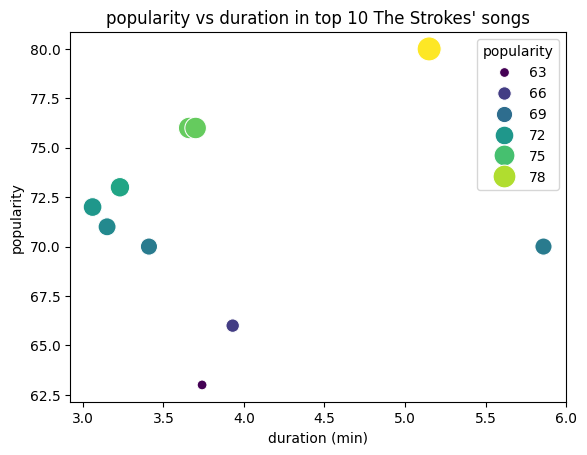

In [ ]:
sns.scatterplot(
    x="duration_min", 
    y="popularity", 
    data=df, 
    marker="o",  
    hue= 'popularity',
    size ='popularity',
    sizes = (50,300),
    palette='viridis')
plt.xlabel("duration (min)")
plt.ylabel("popularity")
plt.title("popularity vs duration in top 10 The Strokes' songs")

El gráfico muestra que no hay correlación entre la duración y la popularidad de una canción 